In [33]:
import os
import tensorflow as tf
from PIL import Image
import numpy as np


    
# Define the folder location
folder_location = r"C:\Users\shaif\Downloads\Compressed\Labeled Baylor 8-30-23\Labeled Baylor 8-30-23\Zebra Ped 1a Image1a\Pedi"

folders = os.listdir(folder_location)

# Define the desired image size
target_size = (40, 40)

# Initialize an empty list to store the processed images
processed_images = []

# Iterate through each folder
for folder in folders:
    # Construct the folder path
    folder_path = os.path.join(folder_location, folder)
    
    # List all images in the folder
    images = os.listdir(folder_path)
    
    # Iterate through each image
    for image_name in images:
        # Construct the image path
        image_path = os.path.join(folder_path, image_name)
        
        # Open the image using PIL
        image = Image.open(image_path)
        
        # Resize the image using TensorFlow
        resized_image = tf.image.resize_with_crop_or_pad(
            tf.keras.preprocessing.image.img_to_array(image),
            target_size[0],
            target_size[1]
        )
        
        # Normalize the data for deep learning
        normalized_image = (resized_image - 127.5) / 127.5
        
        # Append the processed image to the list
        processed_images.append(normalized_image)

# Convert the list of images to a NumPy array
processed_images = np.array(processed_images)
processed_images.shape

(2311, 40, 40, 3)

In [16]:
from tensorflow.keras.models import load_model
# Define the path to the model file
model_path = r'E:\single_image_model.h5'
# Load the model with custom_objects argument
model = load_model(model_path)
# Print the model summary
#model.summary()

In [34]:
x = model.predict(processed_images)
res = np.argmax(x,axis = 1)
count_0 = 0
count_1 = 0
count_2 = 0

# Count the numbers
for i in res:
    if(i==0):
        count_0  = count_0  + 1
    elif(i==1):
        count_1  = count_1  + 1
    else:
        count_2  = count_2  + 1

# Print the counts
print("Count of 0:", count_0)
print("Count of 1:", count_1)
print("Count of 2:", count_2)

73/73 [==============================] - 0s 4ms/step
Count of 0: 159
Count of 1: 2152
Count of 2: 0


In [35]:
import os

def count_images_in_subdirs(folder_location):
    subdir_image_counts = []
    
    for subdir in os.listdir(folder_location):
        subdir_path = os.path.join(folder_location, subdir)
        
        if os.path.isdir(subdir_path):
            image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))])
            subdir_image_counts.append(image_count)
    
    return subdir_image_counts

image_counts = count_images_in_subdirs(folder_location)


In [36]:
x = model.predict(processed_images)
result1 = []
res_detailed1 = []
y = 0
for i in image_counts:
    larvae = x[y:y+i]
    y = i+y
    average = np.mean(larvae, axis=0)
    #print((average))
    pred = np.argmax(average)
    #print(pred)
    result1.append(pred)
    res_detailed1.append(average)

print(result1)

73/73 [==============================] - 0s 5ms/step
[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [31]:
length_of_result = len(result)
# Step 2: Create a new list with that length filled with 1s
new_list = [0] * length_of_result
print(new_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
length_of_result = len(result1)
# Step 2: Create a new list with that length filled with 1s
new_list1 = [1] * length_of_result
print(new_list1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [38]:
combined_list = result + result1

print(combined_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [39]:
y_list = new_list + new_list1

print(y_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Accuracy: 0.9420289855072463
Balanced Accuracy: 0.942942942942943


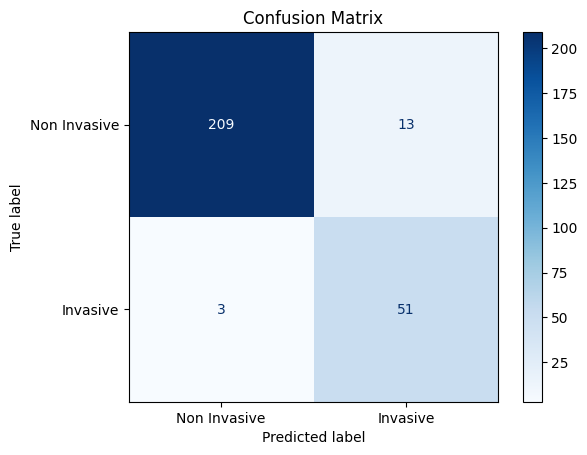

In [47]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Calculate accuracy and balanced accuracy
accuracy = accuracy_score(y_list, combined_list)
balanced_accuracy = balanced_accuracy_score(y_list, combined_list)

# Calculate confusion matrix
cm = confusion_matrix(y_list, combined_list, labels=[0, 1])

# Display the confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Invasive', 'Invasive'])
disp.plot(cmap=plt.cm.Blues, values_format=".4g")

# Add title
plt.title("Confusion Matrix")

# Print accuracy and balanced accuracy
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

# Show the plot
plt.show()


In [45]:
F1 = cm[1][1]/cm[1][1] + (.5*(cm[0][1] + cm[1][0]))
print(F1)

9.0


In [46]:

count_0 = y_list.count(0)
count_1 = y_list.count(1)

print(f"Number of 0s: {count_0}")
print(f"Number of 1s: {count_1}")


Number of 0s: 222
Number of 1s: 54


In [51]:
res_detailed = [row[:2] for row in res_detailed]
res_detailed1 = [row[:2] for row in res_detailed1]

In [52]:
combined_array = np.concatenate((res_detailed, res_detailed1), axis=0)

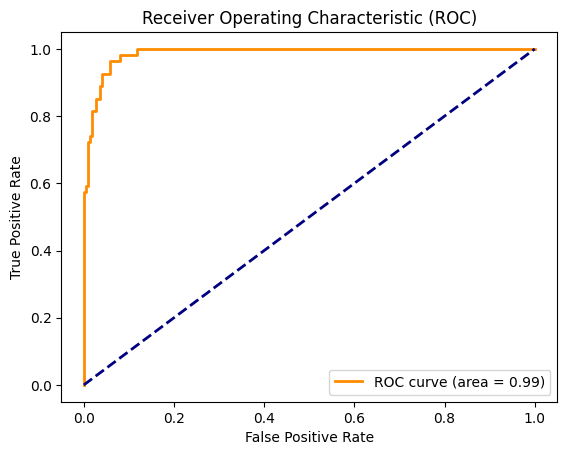

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probabilities of class 1
y_scores = [item[1] for item in combined_array]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_list, y_scores)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
